<a href="https://colab.research.google.com/github/MINJIN82/-Ubion/blob/main/Ashopping_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumbarunGothic')

In [ ]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/mini/230322_ashopping_class_vip.xlsx")
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Recency_reverse,Class
0,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,5,6,6,5,6,1,1
1,8,0,12717240,109,116672,4,354735,1,2,1,...,5,7,6,6,5,6,6,6,1,1
2,40,0,14410060,24,600419,15,326795,1,3,0,...,7,6,5,5,7,6,6,6,1,1
3,52,0,19283170,33,584338,1,3750,1,3,0,...,6,6,6,6,6,6,6,6,1,1
4,59,0,14091390,56,251632,22,351745,1,2,0,...,6,6,5,4,5,6,5,5,1,1


In [ ]:
df.isnull().sum()

고객ID                 0
이탈여부                 0
총_매출액                0
방문빈도                 0
1회_평균매출액             0
할인권_사용 횟수            0
총_할인_금액              0
고객등급                 0
구매유형                 0
클레임접수여부              0
구매_카테고리_수            0
거주지역                 0
성별                   0
고객_나이대               0
거래기간                 0
할인민감여부               0
멤버쉽_프로그램_가입전_만족도     0
멤버쉽_프로그램_가입후_만족도     0
Recency              0
Frequency            0
Monetary             0
상품_만족도               0
매장_만족도               0
서비스_만족도              0
상품_품질                0
상품_다양성               0
가격_적절성               0
상품_진열_위치            17
상품_설명_표시            40
매장_청결성               0
공간_편의성               0
시야_확보성               0
음향_적절성               0
안내_표지판_설명            0
친절성                  0
신속성                  0
책임성                  0
정확성                  0
전문성                  0
Recency_reverse      0
Class                0
dtype: int64

In [ ]:
df =df.fillna(0)
df.isnull().sum()

고객ID                0
이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용 횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
Recency_reverse     0
Class               0
dtype: int64

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       'Recency_reverse', 'Class'],
      dtype='object')

In [ ]:
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

<Axes: >

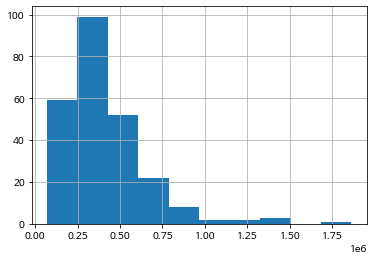

In [ ]:
df["1회_평균매출액"].hist()

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f09887e0e20>, <matplotlib.lines.Line2D object at 0x7f09887fa100>], 'caps': [<matplotlib.lines.Line2D object at 0x7f09887fa3a0>, <matplotlib.lines.Line2D object at 0x7f09887fa640>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f09887e0b50>], 'medians': [<matplotlib.lines.Line2D object at 0x7f09887fa8e0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f09887fab80>], 'means': []})

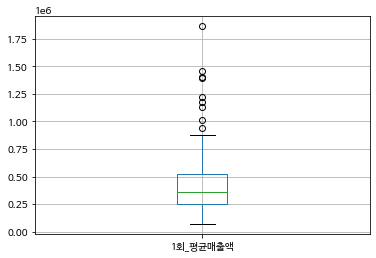

In [ ]:
df.boxplot(column="1회_평균매출액", return_type="both")

<Axes: >

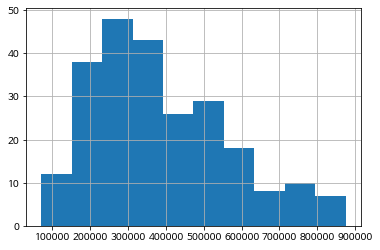

In [ ]:
q1 = df["1회_평균매출액"].quantile(q=0.25)
q3 = df["1회_평균매출액"].quantile(q=0.75)
IQR = q3-q1
IQR

data_IQR = df[(df["1회_평균매출액"] < q3 + IQR * 1.5) & (df["1회_평균매출액"] > q1 - IQR * 1.5)]
data_IQR["1회_평균매출액"].hist()

In [ ]:
df=data_IQR
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Recency_reverse,Class
0,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,5,6,6,5,6,1,1
1,8,0,12717240,109,116672,4,354735,1,2,1,...,5,7,6,6,5,6,6,6,1,1
2,40,0,14410060,24,600419,15,326795,1,3,0,...,7,6,5,5,7,6,6,6,1,1
3,52,0,19283170,33,584338,1,3750,1,3,0,...,6,6,6,6,6,6,6,6,1,1
4,59,0,14091390,56,251632,22,351745,1,2,0,...,6,6,5,4,5,6,5,5,1,1


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       'Recency_reverse', 'Class'],
      dtype='object')

In [ ]:
df.groupby(by=['구매유형'],as_index=False)["총_매출액"].mean()

,구매유형,총_매출액
0,2,1.518358e+07
1,3,1.834938e+07
2,4,9.744223e+06


In [ ]:
df.groupby(by=['구매유형'],as_index=False)["할인권_사용 횟수"].sum()

,구매유형,할인권_사용 횟수
0,2,2395
1,3,970
2,4,447


In [ ]:
df.groupby(by=['구매유형'],as_index=False)["구매_카테고리_수"].sum()

,구매유형,구매_카테고리_수
0,2,877
1,3,350
2,4,167


In [ ]:
a=df.groupby(by=['구매유형'],as_index=False)["1회_평균매출액"].mean()
a

,구매유형,1회_평균매출액
0,2,277766.130137
1,3,633940.349206
2,4,402918.266667


In [ ]:
c= df.groupby(by=['구매유형'],as_index=False)["매장_만족도"].mean()
c

,구매유형,매장_만족도
0,2,5.513699
1,3,5.031746
2,4,4.833333


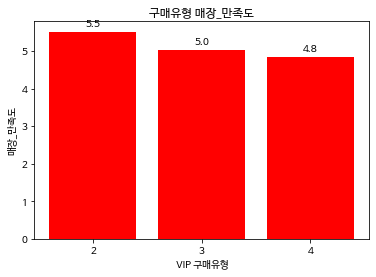

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = c['구매유형']
mean_sales = c["매장_만족도"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('매장_만족도')
ax.set_xlabel(' VIP 구매유형')
ax.set_title('구매유형 매장_만족도')
# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
df.groupby(by=['구매유형'],as_index=False)["총_할인_금액"].mean()


,구매유형,총_할인_금액
0,2,305529.623288
1,3,285491.428571
2,4,275986.666667


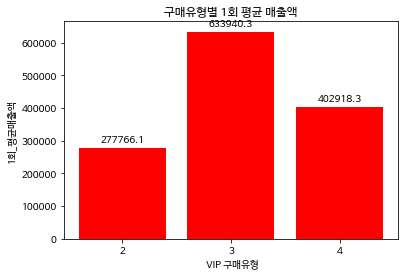

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = a['구매유형']
mean_sales = a["1회_평균매출액"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('1회_평균매출액')
ax.set_xlabel(' VIP 구매유형')
ax.set_title('구매유형별 1회 평균 매출액')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
b= df.groupby(by=['고객_나이대'],as_index=False)["1회_평균매출액"].mean()
b

,고객_나이대,1회_평균매출액
0,1,325431.714286
1,2,395606.769231
2,3,398887.953488
3,4,382312.000000
4,5,338975.882353
5,6,437520.894737
6,7,392245.000000
7,8,364460.937500
8,9,389594.500000


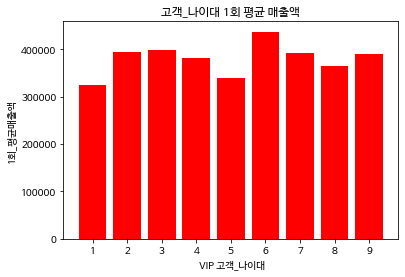

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = b['고객_나이대']
mean_sales = b["1회_평균매출액"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('1회_평균매출액')
ax.set_xlabel(' VIP 고객_나이대')
ax.set_title('고객_나이대 1회 평균 매출액')

plt.show()

In [ ]:
df.groupby(by=['고객_나이대'],as_index=False)["1회_평균매출액"].mean()

,고객_나이대,1회_평균매출액
0,1,325431.714286
1,2,395606.769231
2,3,398887.953488
3,4,382312.000000
4,5,338975.882353
5,6,437520.894737
6,7,392245.000000
7,8,364460.937500
8,9,389594.500000


In [ ]:
z = df.groupby(by=['고객_나이대'],as_index=False)["총_매출액"].sum()
z

,고객_나이대,총_매출액
0,1,101852580
1,2,201093260
2,3,722315970
3,4,669095730
4,5,529543160
5,6,568253750
6,7,471390170
7,8,207696470
8,9,193898800


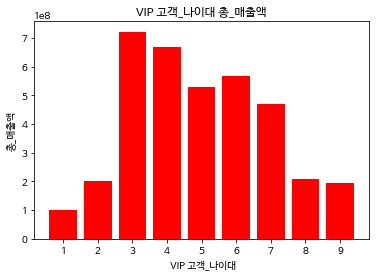

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = z['고객_나이대']
mean_sales = z["총_매출액"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('총_매출액')
ax.set_xlabel(' VIP 고객_나이대')
ax.set_title('VIP 고객_나이대 총_매출액')

plt.show()

In [ ]:
d=df.groupby(by=['거주지역'],as_index=False)["1회_평균매출액"].mean()
d

,거주지역,1회_평균매출액
0,1,667267.000000
1,3,477582.500000
2,4,432899.681818
3,5,439655.981132
4,6,358398.473118
5,7,364714.632353


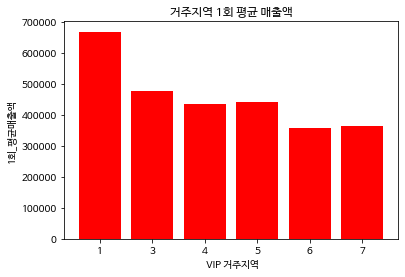

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = d['거주지역']
mean_sales = d["1회_평균매출액"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('1회_평균매출액')
ax.set_xlabel(' VIP 거주지역')
ax.set_title('거주지역 1회 평균 매출액')

plt.show()

In [ ]:
import seaborn as sns

<ipython-input-30-4fe8c553a775>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["1회_평균매출액"])


<Axes: xlabel='1회_평균매출액', ylabel='Density'>

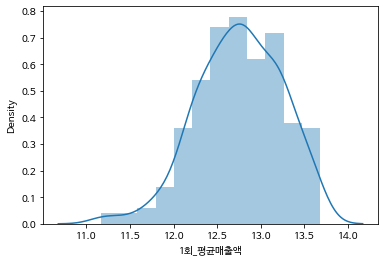

In [ ]:
df["1회_평균매출액"] = np.log1p(df["1회_평균매출액"])
sns.distplot(df["1회_평균매출액"])
#로그log 적용하여 크기 줄여주기,분포를 줄여준다 예측도 잘되고, 분석도 잘된다.

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       'Recency_reverse', 'Class'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #OneHotEncoder 0과1로 쪼개서 반영 /일일이 쪼갤 수 없기 떄문에 인코더로 적용

num = [ '총_할인_금액', '할인권_사용 횟수','고객_나이대', '상품_만족도', '매장_만족도', '서비스_만족도'] #스케일러 적용
cg = ['클레임접수여부','성별','구매유형'] #카테고리컬(범주형) 

X = df[num+cg]
Y = df['1회_평균매출액']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling',StandardScaler(),num),('onehot',OneHotEncoder(sparse = False),cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[ 0.71742493  1.45672018 -1.51892237  0.63325869  1.60874178  1.27269196
  0.          1.          0.          1.          1.          0.
  0.        ]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression #LinearRegression 선형모델
from sklearn.metrics import mean_squared_error 
from math import sqrt #sqrt 루트

lr = LinearRegression().fit(X_train, Y_train) 

Y_pred = lr.predict(X_test)
print("predict value\n",Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) #트레인 데이터로 나온 R스퀘어
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}". format(rmse))

predict value
 [12.41088597 13.25939113 13.34169367 13.12325526 12.41003122 12.43173457
 12.48479045 12.75532928 12.51896319 12.80531737 12.36229606 12.60971814
 13.10684228 12.42480903 12.46865764 12.44779905 12.54377604 12.38201524
 13.20503094 13.45660958 12.40475715 13.35929205 12.38066568 13.4610587
 12.37344583 13.29088669 12.5578555  13.19118028 12.53785294 13.33031504
 12.51097413 12.30569037 13.34192504 13.05318984 12.47671951 12.34443667
 12.69973189 12.80096292 12.4671947  12.63356547 12.43074992 12.37620383
 12.60139523 12.36512793 12.65343663 13.53410322 12.6040006  12.53685784
 12.36820098 13.4766322  12.42025274 12.35442125 12.39754862 12.33360079
 12.33082202 12.35558869 13.31539929 12.39452853 12.39769632 13.44822306
 13.39719322 12.6753503  12.93760217 12.37436723 12.27231254 13.50113729
 13.25185743 12.42200629 12.23666264 12.46030835 13.41775428 12.29447862]
train R2 : 0.619
test R2 : 0.633
RMSE : 0.284


In [ ]:
#릿지(L2) 모형이 라쏘(L1) 모형보다 예측을 더 잘한다.(오차가 적다)
#다수의 변수, 변수의 계수(베타)를 0에 가깝게 만들어야하는 데이터 셋의 경우 라쏘가 더 낫다. 
#알파가 작아지느냐 알파가 커지느냐에 따라 규제 강도가 달라진다.
#알파가 작으면 선형회귀 모형에 가까워지고, 커질 수록 릿지와 라쏘의 모형에 가까워진다.

from sklearn.linear_model import Ridge

lr_ridge = Ridge(random_state = 0). fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))

예측값(Y predict value)
 [12.4168218  13.25105777 13.33356397 13.11781518 12.41541063 12.43667919
 12.48521778 12.75169206 12.51814636 12.80915376 12.36857489 12.6147588
 13.10551439 12.42887042 12.47892702 12.45654487 12.5464572  12.38290916
 13.20023196 13.44895294 12.41572358 13.34983016 12.38476016 13.45303127
 12.37596108 13.27921531 12.55770811 13.18240802 12.54023271 13.31940721
 12.51653358 12.3116875  13.33236151 13.05269564 12.48401579 12.3480499
 12.69966511 12.80529914 12.46651357 12.63532383 12.43744147 12.3793401
 12.60455292 12.36871346 12.65492106 13.52353914 12.60904161 12.54171249
 12.37557594 13.46451382 12.42371577 12.35907812 12.40021982 12.33951546
 12.33558568 12.36261288 13.30839958 12.39940826 12.40194834 13.44000478
 13.38587655 12.67901955 12.93909087 12.38162769 12.27781034 13.4919733
 13.24123978 12.4261829  12.24108974 12.46379947 13.40881797 12.29910001]
ridge R2 : 0.618
RMSE : 0.283
lr R2 : 0.618


In [ ]:
#라쏘
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter =1000). fit(X_train, Y_train) #alpha = 0.01, max_iter =1000) 등 연구자가 정해주는 값이 하이퍼 파라미터이다.
#알파 값에 의해서 규제를 준다.
Y_pred = lr_lasso.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("lasso R2 : {:.3f}". format(lr_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))

예측값(Y predict value)
 [12.49311066 13.20917716 13.32297167 13.17887545 12.43562189 12.49679195
 12.4845266  12.71275909 12.43974528 12.78071403 12.42942132 12.59405059
 13.00522154 12.48624986 12.51610012 12.52693772 12.50954736 12.39117635
 13.21502638 13.36253452 12.4923556  13.26467897 12.44281021 13.35774215
 12.44268449 13.25954374 12.47232149 13.1606443  12.55856573 13.29518146
 12.52246159 12.40888389 13.34140781 12.98247891 12.57245103 12.41610805
 12.75318204 12.8535653  12.45028844 12.56715849 12.49224561 12.41061686
 12.67582472 12.39275117 12.61090531 13.41523785 12.58704834 12.58043407
 12.40838748 13.34230567 12.48790312 12.35799377 12.35928012 12.3679385
 12.4099622  12.37204255 13.28270741 12.49740268 12.44265454 13.43771993
 13.31653514 12.74726322 12.92584885 12.44048756 12.33255639 13.34870045
 13.28972714 12.48735465 12.34242117 12.48284318 13.37108239 12.40943327]
lasso R2 : 0.607
RMSE : 0.270
lr R2 : 0.619
ridge R2 : 0.618


In [ ]:
#엘라스틱 넷 => 다양한 방식을 통해 예측방법을 확대할 수 있다.
from sklearn.linear_model import ElasticNet

lr_ela = ElasticNet( alpha = 0.01). fit(X_train, Y_train)
Y_pred = lr_ela.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("ela R2 : {:.3f}". format(lr_ela.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))
print("lasso R2 : {:.3f}". format(lr_lasso.score(X_train, Y_train)))

예측값(Y predict value)
 [12.46492126 13.22240785 13.32136495 13.14510653 12.43525886 12.47361017
 12.47271962 12.72748888 12.47041627 12.79837373 12.41067493 12.60899607
 13.04928588 12.46435161 12.5102218  12.4966256  12.52636663 12.38258256
 13.21584652 13.40018975 12.46463635 13.30174456 12.42019646 13.39186
 12.41596126 13.25521863 12.50983713 13.17373781 12.53619834 13.31254424
 12.52924373 12.36390371 13.34018582 13.0139516  12.5383641  12.39059988
 12.72516848 12.83841637 12.4639708  12.59435812 12.46878738 12.3868198
 12.63955351 12.38809284 12.63639887 13.46399058 12.60393946 12.57073394
 12.38138699 13.38910143 12.45285859 12.34853996 12.36573803 12.36479143
 12.37963859 12.37775046 13.29497234 12.45858459 12.43228718 13.44223098
 13.35113338 12.71421417 12.92592765 12.42227786 12.29656012 13.40518632
 13.26695594 12.45248776 12.30463588 12.45994728 13.39352833 12.3633868 ]
ela R2 : 0.614
RMSE : 0.276
lr R2 : 0.619
ridge R2 : 0.618
lasso R2 : 0.607


In [ ]:
#knn최근접이웃
#numeric value(Y)

import numpy as np

num = [ '총_할인_금액', '할인권_사용 횟수','고객_나이대', '상품_만족도', '매장_만족도', '서비스_만족도'] #스케일러 적용
cg = ['클레임접수여부','성별','구매유형'] #카테고리컬(범주형) 

X = df[num+cg]
Y = df['1회_평균매출액']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling',StandardScaler(),num),('onehot',OneHotEncoder(sparse = False),cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#스케일러 적용
scaler = StandardScaler(). fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors =9, p=2)

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy :{:.3f}".format(knn_reg.score(X_train, Y_train))) 
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

accuracy :0.601
RMSE: 0.326


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#의사결정나무
#numeric value(Y)

import numpy as np
num = [ '총_할인_금액', '할인권_사용 횟수','고객_나이대', '상품_만족도', '매장_만족도', '서비스_만족도'] #스케일러 적용
cg = ['클레임접수여부','성별','구매유형'] #카테고리컬(범주형) 

X = df[num+cg]
Y = df['1회_평균매출액']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling',StandardScaler(),num),('onehot',OneHotEncoder(sparse = False),cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state=0,max_depth =5)
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse :{:.3f} ",format(rmse))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


accuracy : 0.765
rmse :{:.3f}  0.33277330470228667


In [ ]:
feature_name = X.columns
feature_importance = DT_model_reg.feature_importances_
sorted(zip(feature_importance, feature_name),reverse=True)

[(0.07586127854016436, '총_할인_금액'),
 (0.06549489741242909, '매장_만족도'),
 (0.03990608700816696, '서비스_만족도'),
 (0.026816166260660235, '고객_나이대'),
 (0.020980395527985616, '할인권_사용 횟수'),
 (0.01063052881987015, '상품_만족도'),
 (0.00017607983410530546, '클레임접수여부'),
 (0.0, '성별'),
 (0.0, '구매유형')]

In [ ]:
a = DT_model_reg.feature_importances_

In [ ]:
b = pd.DataFrame(a)
b

,0
0,0.075861
1,0.020980
2,0.026816
3,0.010631
4,0.065495
5,0.039906
6,0.000176
7,0.000000
8,0.000000
9,0.014585


In [ ]:
DT_model_reg.feature_importances_

array([7.58612785e-02, 2.09803955e-02, 2.68161663e-02, 1.06305288e-02,
       6.54948974e-02, 3.99060870e-02, 1.76079834e-04, 0.00000000e+00,
       0.00000000e+00, 1.45845736e-02, 6.62624741e-01, 0.00000000e+00,
       8.29252521e-02])

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

# # 데이터 생성
# X, y = make_classification(n_samples=1000, n_informative=5, n_redundant=0, random_state=42)

# # 모델 학습
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X, y)

# # feature importance 출력
# for i, imp in enumerate(clf.feature_importances_):
#     print("Feature %d: %f" % (i, imp))

In [ ]:
X_train[1]

array([ 0.96175649,  0.82778463,  0.99256313, -0.76745921, -0.23771786,
        0.06508084,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ])

In [ ]:
df[num+cg]

,총_할인_금액,할인권_사용 횟수,고객_나이대,상품_만족도,매장_만족도,서비스_만족도,클레임접수여부,성별,구매유형
0,246350,9,6,5,6,6,0,0,2
1,354735,4,4,6,7,7,1,1,2
2,326795,15,3,3,4,5,0,1,3
3,3750,1,4,4,6,7,0,0,3
4,351745,22,7,6,5,6,0,1,2
...,...,...,...,...,...,...,...,...,...
243,348145,20,6,4,5,4,0,1,3
244,380395,23,6,6,6,5,0,1,3
245,186545,6,6,5,5,7,0,0,2
246,347700,20,6,4,6,5,0,1,3


In [ ]:
X

,총_할인_금액,할인권_사용 횟수,고객_나이대,상품_만족도,매장_만족도,서비스_만족도,클레임접수여부,성별,구매유형
0,246350,9,6,5,6,6,0,0,2
1,354735,4,4,6,7,7,1,1,2
2,326795,15,3,3,4,5,0,1,3
3,3750,1,4,4,6,7,0,0,3
4,351745,22,7,6,5,6,0,1,2
...,...,...,...,...,...,...,...,...,...
243,348145,20,6,4,5,4,0,1,3
244,380395,23,6,6,6,5,0,1,3
245,186545,6,6,5,5,7,0,0,2
246,347700,20,6,4,6,5,0,1,3


In [ ]:
num+cg

['총_할인_금액',
 '할인권_사용 횟수',
 '고객_나이대',
 '상품_만족도',
 '매장_만족도',
 '서비스_만족도',
 '클레임접수여부',
 '성별',
 '구매유형']

In [ ]:
df["구매유형"].unique()

array([2, 3, 4])

In [ ]:
#인공신경망

#numeric value(Y)

import numpy as np

num = [ '총_할인_금액', '할인권_사용 횟수','고객_나이대', '상품_만족도', '매장_만족도', '서비스_만족도'] #스케일러 적용
cg = ['클레임접수여부','성별','구매유형'] #카테고리컬(범주형) 

X = df[num+cg]
Y = df['1회_평균매출액']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling',StandardScaler(),num),('onehot',OneHotEncoder(sparse = False),cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 모델링
from sklearn.neural_network import MLPRegressor

#4-1. 모델 생성
nn_reg_model = MLPRegressor(random_state = 0,alpha=0.001, max_iter = 2000, hidden_layer_sizes=[50,50])

#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value :\n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
print("RMSE : {:.3f}". format(rmse))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Y predict value :
 [11.88218475 13.2078855  14.33150019 13.10451463 12.23866183 12.02707072
 13.20639393 13.42489563 13.30109588 13.32137779 12.15276193 12.29518412
 13.57949604 11.90845695 13.23167788 12.37311289 12.56714109 12.43680867
 13.38955523 13.67970977 12.96482943 12.82987512 12.29042988 13.58203589
 12.50771502 13.20498608 12.57179716 13.23627379 13.29875463 12.54871579
 11.99756289 11.88727634 13.07558075 12.26807455 12.394149   12.0875396
 12.19645536 12.4349536  12.45140539 12.30126895 12.55574026 11.81510501
 12.78333903 12.3348307  12.21506122 13.93912651 12.96598112 12.68451777
 12.49696288 14.83105465 11.60284316 12.04802614 13.11455909 12.01936749
 12.74197516 12.17690344 12.7992495  12.20794835 12.45529875 13.76744078
 13.04099955 13.28509444 13.68752137 12.56858024 12.48165084 16.63295237
 13.74721679 12.29760021 12.33685973 12.86957048 13.04143485 12.25670969]
train accuracy : 0.600
accuracy : 0.600
RMSE : 0.611


In [ ]:
feature_name = X.columns
feature_importance = nn_reg_model.feature_importances_
sorted(zip(feature_importance, feature_name),reverse=True)

AttributeError: ignored